<h2 style="text-align: center;"><b>Домашнее задание 4. Предобработка данных. Кластеризация при помощи kNN.
</b></h2>

В этом домашнем задании нам нужно закрепить базовые понятия машинного обучения и научиться работать с простейшим метрическим алгоритмом кластеризации - kNN.

**Правила:**

- **Мягкий дедлайн:** 8 ноября 23:59. При отправке решения до этого момента вы можете получить отзыв и исправить найденные ошибки без штрафа до жёсткого дедлайна.
- **Жёсткий дедлайн:** 15 ноября 23:59. Решения, отправленные позже, проверяться не будут, кроме случаев наличия уважительной причины.

- Нужно написать письмо на **krivch.nik@gmail.com**. 
- В письме должна быть ссылка на решение на платформе `Google Colab`. Меня (krivch.nik@gmail.com) нужно будет добавить в соавторы. Для надёжности, стоит присылать ещё два файла: ipynb-файл с решением и его pdf-версию. 
- Формат темы письма: "[DS Reboot] ФИО — Задание 4" (без кавычек). **Формат фиксирован, его нужно строго придерживаться**, чтобы ваше письмо не потерялось! 
- Дедлайн по заданию фиксируется в анонсе соответствующего занятия.
- Результаты проверки будут в ответном письме. Там же будут комментарии и рекомендации.  
- Иногда будут задачи со звёздочкой. За них будут начисляться отдельные, бонусные баллы. Количество бонусных баллов будет учитываться в конце курса, когда нужно будет выбирать, кого из участников порекомендовать потенциальным работодателям.

Решения, размещенные на каких-либо интернет-ресурсах, не принимаются.
Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Пропущенные описания принимаемых аргументов дописать на русском. При написании кода придерживайтесь `pep8` и используйте `type hints`.

Мягкий дедлайн предполагает отправку обратной связи и комментарии по выполнению.  
**После жесткого дедлайна задания не принимаются.**

## Предсказание оттока телеком компании

#### Что такое "скорость оттока"?

Коэффициент оттока - это процент подписчиков на услугу, которые прекращают свою подписку на услугу в течение заданного периода времени. Для того чтобы компания могла расширить свою клиентуру, ее темпы роста, измеряемые числом новых клиентов, должны превышать темпы оттока. Этот показатель обычно выражается в процентах.

#### Почему отток так важен?

Отток клиентов - это термин, используемый в компаний с подписочной моделью ведения бизнеса, для описания потери клиентов. Например, если 10 из 100 подписчиков интернет-провайдера (ISP) отменили свои подписки, скорость оттока для этого провайдера составит 10%.

Отток важен, потому что он напрямую влияет на прибыльность вашего сервиса. Принято считать, что прибыльность услуги напрямую связана с ростом ее клиентской базы. Это может привести владельцев бизнеса к выводу, что для того, чтобы увеличить свою клиентскую базу, скорость приобретения новых клиентов должна превышать скорость оттока.

#### Что из себя представляет датасет?

Датасет представляет из себя 3333 записи из истории компании о клиентах с 20 колонками. Каждая колонка описывает клиента - его штат проживания, время использования услуги, номер, перечень подписок, время разговора, прочее.

#### В чем состоит ваше задание?

Ниже будет представлен конвейер (pipeline) обработки датасета с комментариями. На основе комментариев и результатов уже выполненых ячеек вам нужно будет восстановить код (на основе материалов занятий) по загрузке, обработке и построении модели наших данных. Желательно придерживаться в обработке результатов, которые вы уже увидите в ячейках.

------

## Загрузка данных

Загрузка данных может зависить от среды, где вы работаете. 

Если это гугл колаб - вам необходимо выполнить следующие комманды:

В первой вам необходимо перейти по ссылке, авторизироваться со своим аккаунтом, скопировать код из окна и вставить в поле выполнения ячейки.

Загружаем все необходимые библиотеки

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

Открываем склонированную папку

In [87]:
df = pd.read_csv('./telecom_churn.csv')

Отображаем данные

In [88]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


В случае, если вы работаете из среды анаконда - вам необходимо положить файл рядом с ноутбуком и выполнить:

```
df = pd.read_csv('./telecom_churn.csv')
```

 

## Работа с признаками

#### Визуальный анализ

Изучим наши данные, какие признаки исходного датасета никак не повлияют на результат прогноза? Выбросим такие столбцы и отобразим результат.

In [89]:
df.describe(include=['O'])

,state,phone number,international plan,voice mail plan
count,3333,3333,3333,3333
unique,51,3333,2,2
top,WV,412-8769,no,no
freq,106,1,3010,2411


In [90]:
df.drop(["phone number"], axis = 1, inplace=True)
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Посмотрим на описательную статистику, которая суммирует центральную тенденцию, дисперсию и форму распределения набора данных. Корректно ли все заполнено?

In [91]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


Исследуем на наличие пропусков

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   international plan      3333 non-null   object 
 4   voice mail plan         3333 non-null   object 
 5   number vmail messages   3333 non-null   int64  
 6   total day minutes       3333 non-null   float64
 7   total day calls         3333 non-null   int64  
 8   total day charge        3333 non-null   float64
 9   total eve minutes       3333 non-null   float64
 10  total eve calls         3333 non-null   int64  
 11  total eve charge        3333 non-null   float64
 12  total night minutes     3333 non-null   float64
 13  total night calls       3333 non-null   int64  
 14  total night charge      3333 non-null   

Посмотрим на типы данных наших столбцов:

In [93]:
df.dtypes

state                      object
account length              int64
area code                   int64
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

Посмотрим как сбалансированны наши классы, можно распечатать или отобразить на грфике. Если не помните почему надо балансировать классы - [тык](https://www.coursera.org/lecture/supervised-learning/niesbalansirovannyie-dannyie-M97UX)

Можно увидеть, что данные несбалансированны.


In [94]:
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

Процент данных показывающих целевую группу "отток" 0.14


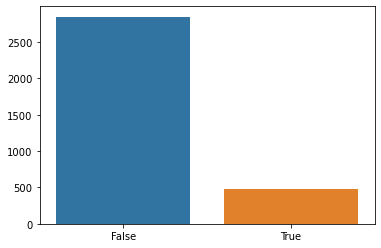

In [95]:
print('Процент данных показывающих целевую группу "отток" 0.14')
y = df["churn"].value_counts()
sns.barplot(y.index, y.values)


In [96]:
y_True = df["churn"][df["churn"] == True]
print ("Churn Percentage = "+str( (y_True.shape[0] / df["churn"].shape[0]) * 100 ))

Churn Percentage = 14.491449144914492


#### Работа с категориальными признаками

Если вы не понимаете логику за работой с котегориальными признаками - посмотрите [сюда](https://www.coursera.org/lecture/supervised-learning/rabota-s-katieghorial-nymi-priznakami-pqU2j), если же не знаете как это сделать в коде - [сюда](https://colab.research.google.com/drive/17UJ3zkE6dUL5UpQnLiaQp3f7BpV6iEss#scrollTo=_238K7-NQajf), пункт про категориальные признаки.

Посмотрим на те колонки, в которых тип данных object (строка) и перекодируем их, воспользуемся кодом с занятия.

In [128]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

df['state'] = label_encoder.fit_transform(df['state'])
df['international plan'] = label_encoder.fit_transform(df['international plan'])
df['voice mail plan'] = label_encoder.fit_transform(df['voice mail plan'])
df['churn'] = label_encoder.fit_transform(df['churn'])

df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


Выделим целевую переменную в бинарный формат (в отдельную переменную)

In [131]:
df['churn'] = df['churn'].astype('int64')
y = np.array(df['churn'])
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Выделим целевую переменную в бинарный формат и выкинем ее из обучающей выборки.

In [132]:
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


Посмотрим на распределение величин по признакам в наших данных

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002374C723910>,
      dtype=object)

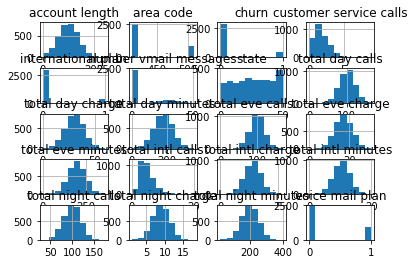

In [133]:
df.hist()

Построим матрицу корреляций, выбросим данные с единичной линейной зависимостью - они (шум) просто повысят вычислительную сложность.

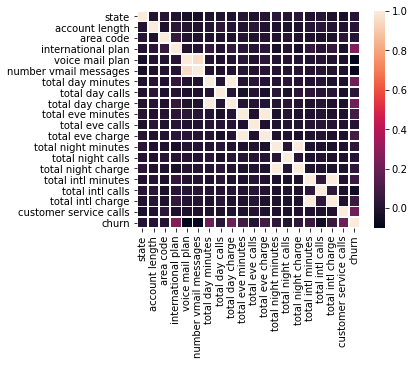

In [134]:
# calculate the correlation matrix
corr = df.corr()

fig = plt.figure(figsize=(5,4))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
            linewidths=.75)

In [135]:
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


## Работа с данными

Создадим обучающую выборку Х, перевдем получанные цифровые данные в np.array

Нормализуем наши данные. Если не помните зачем это делать? [тык](https://www.coursera.org/lecture/supervised-learning/masshtabirovaniie-priznakov-ozNT3)

In [136]:
X = df.iloc[:,0:19].values
y = df.iloc[:,19].values

#normalize the data
from sklearn.preprocessing import StandardScaler


X_std = StandardScaler().fit_transform(X)
dfNorm = pd.DataFrame(X_std, index=df.index, columns=df.columns[0:19])

# # add non-feature target column to dataframe
dfNorm['churn'] = df['churn']
dfNorm.head(10)

X = dfNorm.iloc[:,0:19].values
y = dfNorm.iloc[:,19].values

Надо помнить, что наша выборка несбралансирована, так что надо будет провести ее балансировку, в ходе занятия было показано, что будет (у precision 0.18), если ее не проводить:

Найдем по y индексы клиентов, которые относятся к классу "не ушили"
и, перемешав выборку, обрежем ее до размеров "ушедших". Т.к. это на занятии не разбиралось - код прилагается.

Альтернативой выбрасыванию ценных данных - модифицировать шаг градиентного спуска для класса с несбалансированными данными.

Большинство алгоритмов sklearn имеют аргумент class_weight, который принимает на вход частоты каждого распознаваемого класса или считает их вытоматически, если указано 'balanced'

Пример из алгоримта SVM:

class_weight dict or ‘balanced’, default=None

Set the parameter C of class i to class_weight[i]*C for SVC. If not given, all classes are supposed to have weight one. The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y))

Использовать модифицированный шаг градиентного спуска предпочтительнее, если алгоритм поддерживает его (в большинстве случаев так и есть). В качестве примера возможного варинта балансировки - убрать лишние данные. Ниже представлен код, который находит индексы в зависимости от метки класса и выбрасывает лишние.

In [137]:
# np.argwhere вернет индексы тех элементов массива y (целевой переменной), где значение 0
not_churn_ids = np.argwhere(y == 0).flatten()
print('Всего не ушедших', len(not_churn_ids))
not_churn_ids

Всего не ушедших 2850


array([   0,    1,    2, ..., 3330, 3331, 3332], dtype=int64)

Перемешаем массив с выбранным random state (чтоб в дальнейшем у нас совпадали выборки) выберем в нем "лишние" id тех, кто остались (кто портит нам прогноз алгоритма). Кол-во "лишних" = кол-во оставшихся - кол-во ушедшых.

In [138]:
from sklearn.utils import shuffle

not_churn_ids = shuffle(not_churn_ids, random_state = 42)
# найдем "лишних", для этого обрежем найденные id на кол-во ушедших (внутри len)
not_churn_ids = not_churn_ids[len(np.argwhere(y == 1).flatten()):]
print(len(not_churn_ids))
# отображаем кол-во и сами id, которые мы должны выкинуть
not_churn_ids

2367


array([ 877, 3298,  614, ..., 1291, 1482,  989], dtype=int64)

Проверим, сбалансированны ли классы

по идее (оставшиеся) - ("лишние") = (ушедшие)

In [139]:
len(np.argwhere(y == 0).flatten()) - len(not_churn_ids) == len(np.argwhere(y == 1).flatten())

True

Теперь можно выкинуть "лишние" id из X и y

In [140]:
# np.delete принимает массив, индексы, которые выбросить и по какой оси выкидывать
X = np.delete(X, not_churn_ids, 0)
y = np.delete(y, not_churn_ids, 0)

In [141]:
# отобразим итоговый размер признаков датасета
X.shape, y.shape

((966, 19), (966,))

Теперь видим, что классы сбалансированы.

In [142]:
pd.Series(y).value_counts()

1    483
0    483
dtype: int64

## Создание алгоритмов

Посмотрим на 2 типа алгоритмов, которые мы прошли - KNN и линейную модель. В случае KNN будем решать задачу классификации. В случае линейного классификатора, для демонстрации всей обработки, будем использовать регрессию.

Разделим нашу выборку на test train в соотношении 85 на 15 %

In [143]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.15, random_state=0)

X_train.shape, y_train.shape, X_test.shape , y_test.shape

((821, 19), (821,), (145, 19), (145,))

#### KNN

Построим сетку, по аналогии с занятием 6, для перебора гиперпараметра для нахождения лучшего гиперпараметра KNN, пройдем 100 значений (от 1 до 100)

In [144]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


In [153]:
from sklearn.metrics import accuracy_score,roc_auc_score

In [167]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print("accuracy_score",accuracy_score(y_test, predictions))
print("auc",roc_auc_score(y_test, predictions))
knc = [clf.__class__,accuracy_score(y_test, predictions),roc_auc_score(y_test, predictions)]

accuracy_score 0.8413793103448276
auc 0.8403121431290445


#### Логистическая регрессия

Здесь Вам нужно применить логистическую регрессию, по аналогии с занятием и оценить результат по $R^2$ и MAE.
Теперь без подсказок

In [161]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Logistic regression score =',round(metrics.accuracy_score(y_test, y_pred),2))

Logistic regression score = 0.77


In [162]:
from sklearn.model_selection import cross_val_score


scores = cross_val_score(logreg, X, y, cv=5, scoring='accuracy') 
print('Logistic regression of each partition\n',scores)
print('Mean score of all the scores after cross validation =',round(scores.mean(),2)) 

Logistic regression of each partition
 [0.74742268 0.71502591 0.77202073 0.77202073 0.76683938]
Mean score of all the scores after cross validation = 0.75


In [ ]:
DecisionTreeClassifier

In [160]:
from sklearn.tree import DecisionTreeClassifier

In [164]:
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print("accuracy_score",accuracy_score(y_test, predictions))
print("auc",roc_auc_score(y_test, predictions))
dtc = [clf.__class__,accuracy_score(y_test, predictions),roc_auc_score(y_test, predictions)]

accuracy_score 0.8413793103448276
auc 0.8403121431290445
